## Curlew Sandpipers at the Menindee lakes

The Menindee Lakes is a chain of shallow ephemeral freshwater lakes connected to the Darling River to form a storage system. The lakes lie in the far west region of New South Wales, Australia, near the town of Menindee.

<img src="data/Menindee_Satellite.png" alt="drawing" width="400" align="left"/>

In the past few years, the Darling River System along with the Menindee Lakes have been severely impacted by extreme drought conditions. This has resulted in particularly low and prolonged storage inflows, lower storage releases, and high evaporation rates. [Source: MDBA](https://www.mdba.gov.au/river-murray-system/running-river-murray/menindee-lakes-facts)

The Menindee Lakes are an integral breeding ground for the hundreds bird, fish and reptile species in the Murray-Darling Basin, one of the richest ecologies in the country.

Lake Menindee has completely dried up several times in the past few years. (Source: ABC News)

<img src="data/menindee_drought.jpg" alt="drawing" width="400" align="left"/>

### Your task:

You are an ecologist working for Wildaroo, a non-for-profit organisation that protects endangered species across Australia. You have been tasked to come up with an action plan to protect the Curlew Sandpipers, a species of bird commonly found in the Menindee lakes. The number of spotted birds has been declining in recent years due to the lack of water, and Wildaroo wants to start an intervention to increase the numbers of Sandpipers in the area.

Your mission is to identify the areas are most affected by drought and decide the best locations where your organisation should deploy birdfeeders to support the existing population. The ideal place should be close to wet areas, which is the natural habitat of Curlew Sandpipers.

### Load packages

You start by loading the usual Python libraries to start working on this project.

In [2]:
%matplotlib inline

import datacube

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

### Load data

You request Water Observations from Space (WOfS) data for the first 6 months of the year.

In [3]:
dc_menindee = datacube.Datacube(app="Menindee_Lakes")

query = {'lat': (-32.55, -32.25),
         'lon': (142.15, 142.45),
         'time':('2019-01-01', '2019-06-01')}


menindee_19 = dc_menindee.load(product='wofs_albers', **query)

menindee_19

<xarray.Dataset>
Dimensions:  (time: 72, x: 1225, y: 1428)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01T00:20:16 ... 2019-06-01T00:26:42
  * y        (y) float64 -3.553e+06 -3.553e+06 ... -3.589e+06 -3.589e+06
  * x        (x) float64 9.447e+05 9.447e+05 9.448e+05 ... 9.753e+05 9.753e+05
Data variables:
    water    (time, y, x) int16 0 0 0 0 0 0 0 0 ... 239 239 239 239 239 239 239
Attributes:
    crs:      EPSG:3577

### Interpreting WOfS

You want to understand what values are contained in this dataset and use `unique`, a numpy function that returns the unique values contained in an array:

In [4]:
np.unique(menindee_19.water.data)

array([  0,   2,   8,  10,  32,  34,  40,  42,  64,  66,  72,  74,  96,
        98, 104, 106, 128, 130, 131, 136, 138, 139, 160, 162, 163, 168,
       170, 171, 192, 194, 195, 200, 202, 203, 224, 226, 227, 231, 232,
       234, 235, 239], dtype=int16)

There is a special function in DEA that displays the interpretation of mask bitflags in collection. So, you import the required library from the Datacube.

In [5]:
from datacube.storage import masking

masking.describe_variable_flags(menindee_19, with_pandas=True)

,bits,values,description
cloud,6,"{'0': False, '1': True}",Cloudy
cloud_shadow,5,"{'0': False, '1': True}",Cloud shadow
dry,"[7, 6, 5, 4, 3, 1, 0]",{'0': True},No water detected
high_slope,4,"{'0': False, '1': True}",High slope
nodata,0,"{'0': False, '1': True}",No data
noncontiguous,1,"{'0': False, '1': True}",At least one EO band is missing over over/unde...
sea,2,"{'0': False, '1': True}",Sea
terrain_or_low_angle,3,"{'0': False, '1': True}",terrain shadow or low solar angle
wet,"[7, 6, 5, 4, 3, 1, 0]",{'128': True},Clear and Wet


### Creating the mask and computing the median water content

Wet areas are represented using the value `128`, as oposed to dry areas which are represented with the `0` value. You represent the median water content over the first 6 months.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


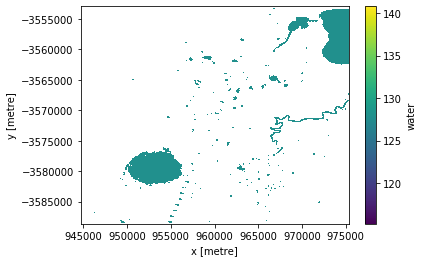

In [6]:
m2019 = menindee_19.water.where(menindee_19.water == 128).median(dim='time')
m2019.plot()

### Replicate for 2001

In [7]:
query = {'lat': (-32.55, -32.25),
         'lon': (142.15, 142.45),
         'time':('2001-01-01', '2001-06-01')}


menindee_01 = dc_menindee.load(product='wofs_albers', **query)

menindee_01

<xarray.Dataset>
Dimensions:  (time: 32, x: 1225, y: 1428)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-07T00:10:49.500000 ... 2001-05-31T00:10:32.500000
  * y        (y) float64 -3.553e+06 -3.553e+06 ... -3.589e+06 -3.589e+06
  * x        (x) float64 9.447e+05 9.447e+05 9.448e+05 ... 9.753e+05 9.753e+05
Data variables:
    water    (time, y, x) int16 0 0 0 0 0 0 0 0 0 ... 72 72 72 72 72 72 72 72 72
Attributes:
    crs:      EPSG:3577

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


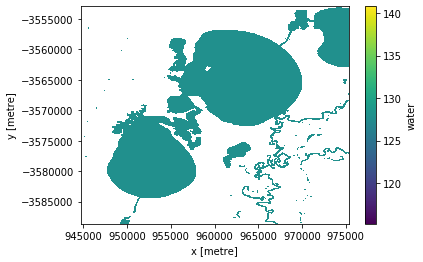

In [8]:
m2001 = menindee_01.water.where(menindee_01.water == 128).median(dim='time')
m2001.plot()

### Representing changes in water using a Semaphore plot

You want to create a plot to represent changes in the water between the years 2001 and 2019. The plot maps the intersection of water areas of both years with the following mapping:

* If a pixel  contains water in both years -> Blue
* If a pixel had water before but doesn't have now -> Red (water lost)
* If a pixel didn't have water but has water now -> Green (new water)
* If a pixel never had water -> Transparent (RGB supports a 4th channel called Alpha for transparency)

_Hint: This is an example of what a semaphore plot looks like for the years 2016-2019 at this location:_
<img src="data/semaphore.png" alt="drawing" width="400"/>

### Coding the semaphore plot

For creating this plot you'll need to:

1. Transform `m2001` and `m2019` to boolean types (water/dry) using a threshold.
2. Use numpy logical functions to compute the boolean values of the different components Red, Green Blue, Alpha. _int: use `np.logical_not()` and `np.logical_and()` to compute the components.
3. Stack the components along a 3rd dimension making use of `np.dstack`
4. Convert the resulting array into `float64` type
5. Plot using matplotlib

(1428, 1225) bool
(1428, 1225) bool
(1428, 1225) bool
(1428, 1225, 4)


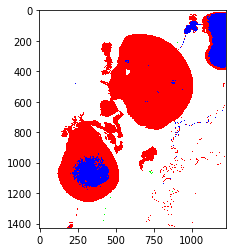

In [9]:
#Solution

mask_2001 = (m2001>100)
mask_2019 = (m2019>100)

print(mask_2001.shape, mask_2001.dtype)
print(mask_2019.shape, mask_2019.dtype)


b = mask_2019 & mask_2001
print(b.shape, b.dtype)
g = mask_2019 & np.logical_not(mask_2001)
r = np.logical_not(mask_2019) & mask_2001
a = np.logical_not(np.logical_not(mask_2019) & np.logical_not(mask_2001))

rgba = np.dstack((r,g,b,a)).astype(np.float64)
print(rgba.shape)


plt.imshow(rgba)

### Interpreting the result

This figure is quite striking and gives you an idea about why the Curlew Sandpipers population has such low numbers in recent years. However, you would like to do some more comparisons with more recent years at different seasons to understand the variability and representativeness of the current situation. 